In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
from turtle import color
from sklearn.linear_model import LinearRegression


In [2]:
data = pd.read_csv("PrivateRoom.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1110 entries, 0 to 1109
Data columns (total 52 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Unnamed: 0.2                                  1110 non-null   int64  
 1   Unnamed: 0.1                                  1110 non-null   int64  
 2   name                                          1110 non-null   object 
 3   description                                   1110 non-null   object 
 4   neighborhood_overview                         1110 non-null   object 
 5   host_name                                     1110 non-null   object 
 6   host_location                                 1110 non-null   object 
 7   host_response_time                            1110 non-null   object 
 8   host_response_rate                            1110 non-null   object 
 9   host_acceptance_rate                          1110 non-null   f

In [3]:
# Elimino las columnas que no voy a utilizar
colums = ['room_type',
'price',
'host_response_rate',
'host_is_superhost',
'host_acceptance_rate',
'bathrooms_text',
'review_scores_cleanliness',
'host_identity_verified',
'instant_bookable',
'property_type']

data = data[colums]

In [4]:
data = data.copy()
data_2 = data.copy()
data_3= data.copy()
data_4 = data.copy()
data_5 = data.copy()
data_6 = data.copy()

<Axes: xlabel='host_acceptance_rate', ylabel='price'>

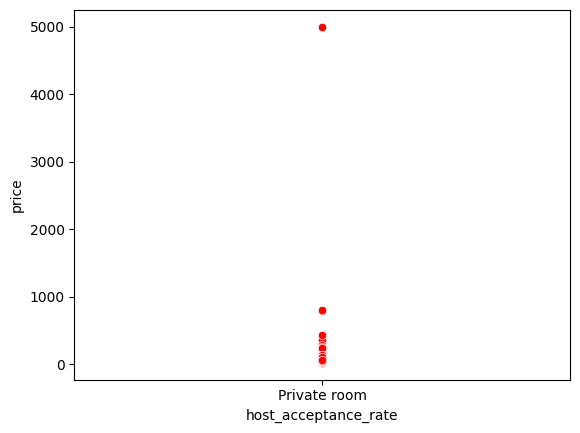

In [5]:
#imprimimos el scarlert plot entre la variable dependiente (total) e independiente (alcohol)
#Dependiente es la que se quiere predecir y la independiente es aquella que puede aportar información para hacer un análisis 


sns.scatterplot(x='host_acceptance_rate', y='price', color='blue', data=data)
sns.scatterplot(x='room_type', y='price', color='red', data=data)


In [6]:
#Declaraqmos las variables dependientes e independiente para la regr4esión lineal 

#Vars_Indep = df[['alcohol], ['speeding]]
Vars_Indep = data[['host_acceptance_rate']]
Var_Dep = data['price']


In [7]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [8]:
type(model)

sklearn.linear_model._base.LinearRegression

In [9]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [10]:
#Verificamos los coeficientes obtenidos para elmodelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.19513351]),
 'rank_': 1,
 'singular_': array([869.63019167]),
 'intercept_': 70.72408290896004}

In [11]:
#Evaluación de la eficiencia del modelo obteniudo por medio del coeficiente R determinación
model.score(Vars_Indep, Var_Dep)

0.0005591930311864557

In [12]:
#Predecimos los valores del total de accidentes a partir de la variable "alcohol"
#y_pred = model.predict(X=df[['alcohol'], ['speeding']])
y_pred = model.predict(X = Vars_Indep)
y_pred

array([89.84716729, 88.87149972, 90.23743432, ..., 89.26176675,
       71.30948345, 90.23743432])

In [13]:
#Se inserta la columna "Predicciones" al dataframe
data.insert(0, 'Predicciones',y_pred)
data

,Predicciones,room_type,price,host_response_rate,host_is_superhost,host_acceptance_rate,bathrooms_text,review_scores_cleanliness,host_identity_verified,instant_bookable,property_type
0,89.847167,Private room,73.0,100%,0.0,98.0,1 private bath,5.000000,1.0,0.0,Private room in home
1,88.871500,Private room,75.0,100%,0.0,93.0,1 shared bath,4.570000,1.0,1.0,Private room in rental unit
2,90.237434,Private room,36.0,100%,1.0,100.0,1 shared bath,4.550000,1.0,0.0,Private room in home
3,90.237434,Private room,41.0,100%,1.0,100.0,1.5 shared baths,4.980000,1.0,0.0,Private room in home
4,87.505565,Private room,50.0,100%,0.0,86.0,1 shared bath,4.640000,1.0,0.0,Private room in home
...,...,...,...,...,...,...,...,...,...,...,...
1105,75.212154,Private room,54.0,80%,0.0,23.0,2 shared baths,4.762193,1.0,1.0,Private room in home
1106,75.212154,Private room,53.0,80%,0.0,23.0,2 shared baths,4.762193,1.0,1.0,Private room in home
1107,89.261767,Private room,112.0,100%,0.0,95.0,1 private bath,4.762193,1.0,0.0,Private room in bed and breakfast
1108,71.309483,Private room,52.0,32%,0.0,3.0,1 bath,4.762193,1.0,0.0,Private room in rental unit


<Axes: xlabel='host_acceptance_rate', ylabel='price'>

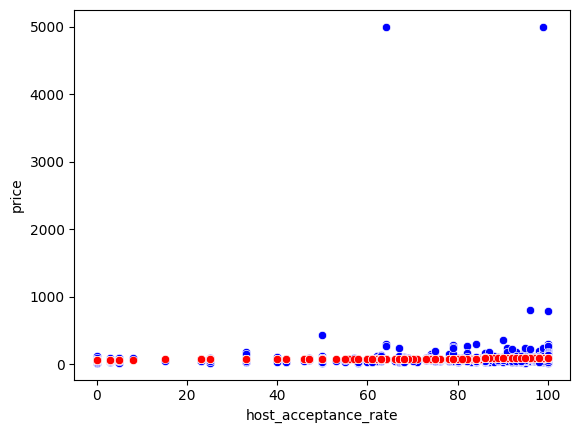

In [14]:
#visualizamos la gráfica comparativa entre el total real y el total predicto
sns.scatterplot(x='host_acceptance_rate', y='price', color="blue", data=data)
sns.scatterplot(x='host_acceptance_rate', y='Predicciones', color="red", data=data)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data=df)

In [15]:
#Corroboramos cual es el coeficiente de Determinción de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.0005591930311864557

In [16]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.023647262657365983

In [17]:
#Eliminamos columna de tipo string
data1=data.drop(data.select_dtypes(include=['object']).columns, axis=1)


C:\Users\aresm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aresm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aresm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values t

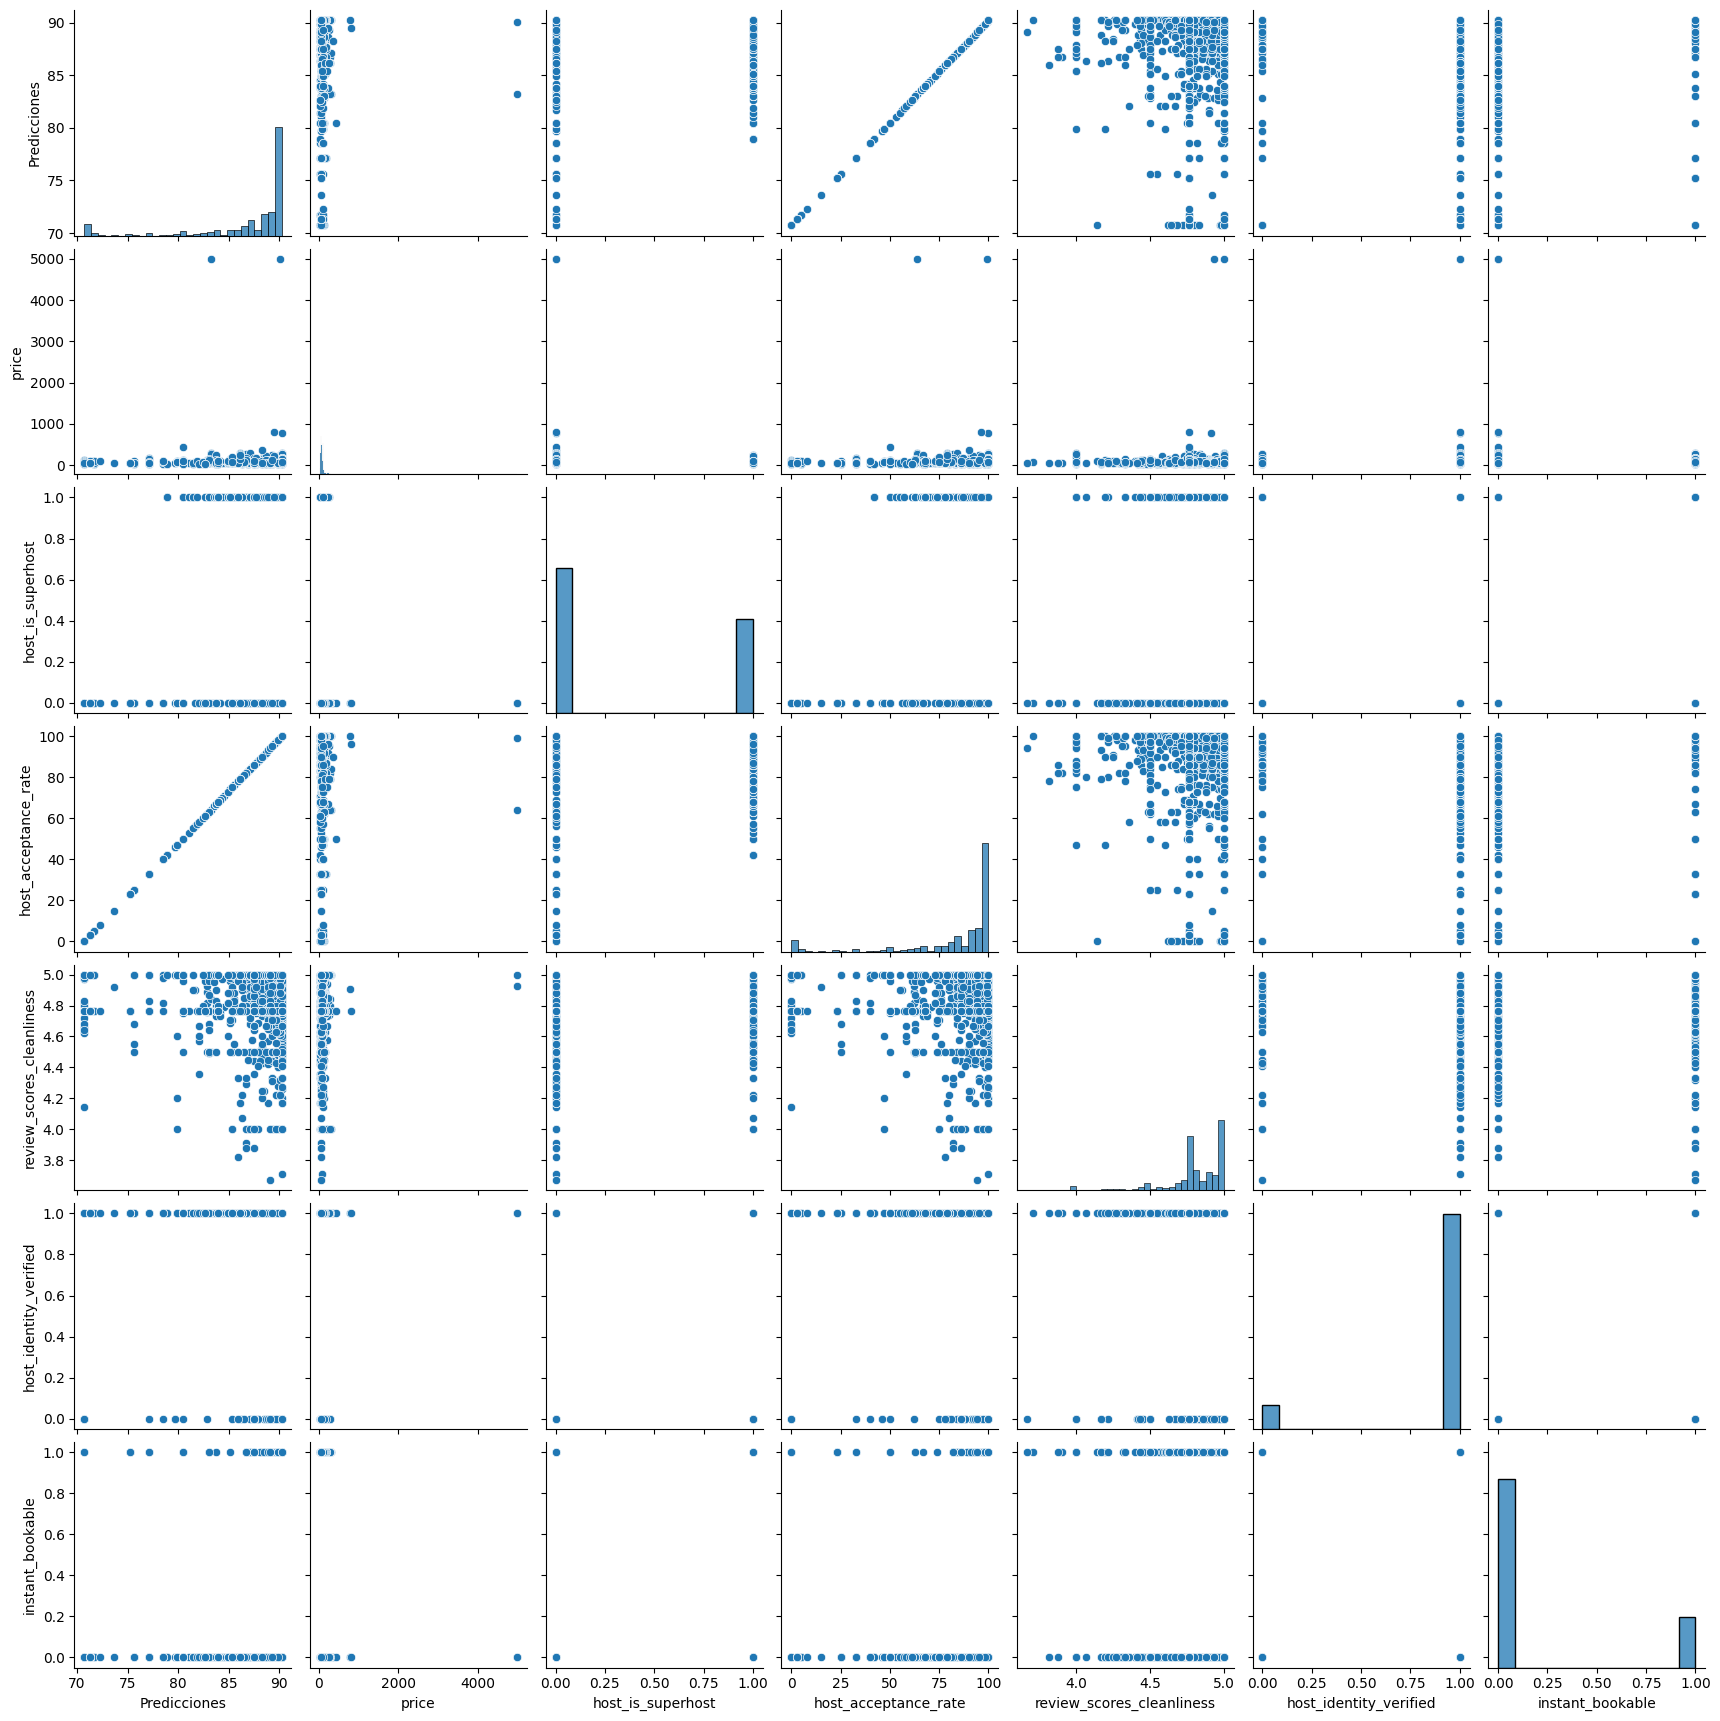

In [18]:
#Graficamos todas laas dispersones entre todas las variables
sns.pairplot(data1)

In [19]:
#Correlaci9ones entre variables
Corr_Factors=data1.corr()
Corr_Factors

,Predicciones,price,host_is_superhost,host_acceptance_rate,review_scores_cleanliness,host_identity_verified,instant_bookable
Predicciones,1.000000,0.023647,0.223062,1.000000,0.021555,-0.067488,0.181277
price,0.023647,1.000000,-0.061531,0.023647,0.041908,0.007500,-0.005605
host_is_superhost,0.223062,-0.061531,1.000000,0.223062,0.228251,-0.026430,-0.049176
host_acceptance_rate,1.000000,0.023647,0.223062,1.000000,0.021555,-0.067488,0.181277
review_scores_cleanliness,0.021555,0.041908,0.228251,0.021555,1.000000,0.045820,-0.086815
host_identity_verified,-0.067488,0.007500,-0.026430,-0.067488,0.045820,1.000000,-0.046973
instant_bookable,0.181277,-0.005605,-0.049176,0.181277,-0.086815,-0.046973,1.000000


In [20]:
#Encotramos el valor absoluto de todas las correlaciones entres ls variables
Corr_Factors1=abs(Corr_Factors)
Corr_Factors1

,Predicciones,price,host_is_superhost,host_acceptance_rate,review_scores_cleanliness,host_identity_verified,instant_bookable
Predicciones,1.000000,0.023647,0.223062,1.000000,0.021555,0.067488,0.181277
price,0.023647,1.000000,0.061531,0.023647,0.041908,0.007500,0.005605
host_is_superhost,0.223062,0.061531,1.000000,0.223062,0.228251,0.026430,0.049176
host_acceptance_rate,1.000000,0.023647,0.223062,1.000000,0.021555,0.067488,0.181277
review_scores_cleanliness,0.021555,0.041908,0.228251,0.021555,1.000000,0.045820,0.086815
host_identity_verified,0.067488,0.007500,0.026430,0.067488,0.045820,1.000000,0.046973
instant_bookable,0.181277,0.005605,0.049176,0.181277,0.086815,0.046973,1.000000


<Axes: >

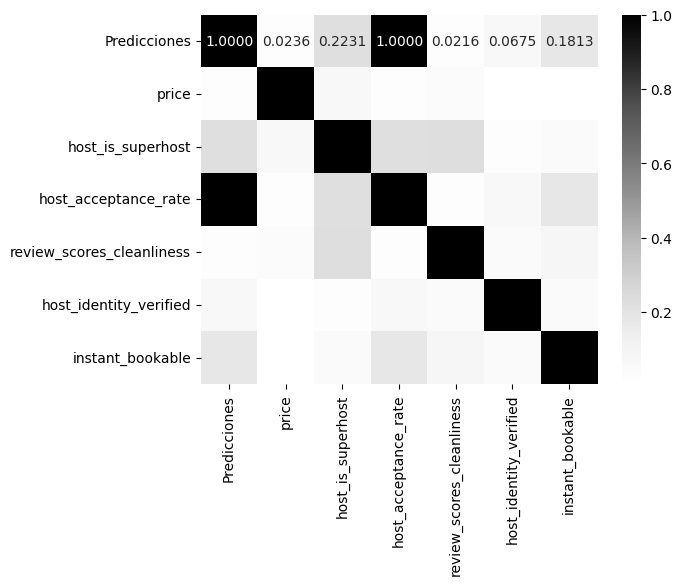

In [21]:
sns.heatmap(Corr_Factors1, cmap = "Grays", annot = True, fmt = ".4f")

**REGRESIÓN PRICE VS HOST_IS_SUPERHOST**

<Axes: xlabel='host_is_superhost', ylabel='price'>

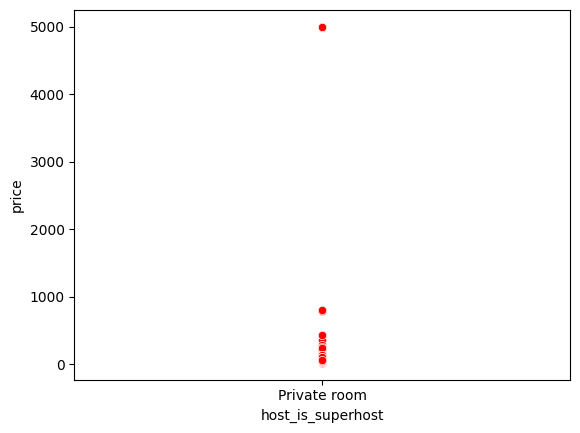

In [22]:
sns.scatterplot(x='host_is_superhost', y='price', color='blue', data=data_2)
sns.scatterplot(x='room_type', y='price', color='red', data=data_2)

In [23]:
#Declaraqmos las variables dependientes e independiente para la regr4esión lineal 

#Vars_Indep = df[['alcohol], ['speeding]]
Vars_Indep = data_2[['host_is_superhost']]
Var_Dep = data_2['price']

In [24]:
model=LinearRegression()

In [25]:
#verificamos la función relacoanda al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [26]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [27]:
#Verificamos los coeficientes obtenidos para elmodelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_is_superhost'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-27.12660957]),
 'rank_': 1,
 'singular_': array([16.27746466]),
 'intercept_': 97.71471025260031}

**modelo matemático**

In [28]:
#Evaluación de la eficiencia del modelo obteniudo por medio del coeficiente R determinación
model.score(Vars_Indep, Var_Dep)

0.00378611112439331

In [29]:
#Predecimos los valores del total de accidentes a partir de la variable "alcohol"
#y_pred = model.predict(X=df[['alcohol'], ['speeding']])
y_pred = model.predict(X = Vars_Indep)
y_pred

array([97.71471025, 97.71471025, 70.58810069, ..., 97.71471025,
       97.71471025, 97.71471025])

In [30]:
#Se inserta la columna "Predicciones" al dataframe
data_2.insert(0, 'Predicciones',y_pred)
data_2

,Predicciones,room_type,price,host_response_rate,host_is_superhost,host_acceptance_rate,bathrooms_text,review_scores_cleanliness,host_identity_verified,instant_bookable,property_type
0,97.714710,Private room,73.0,100%,0.0,98.0,1 private bath,5.000000,1.0,0.0,Private room in home
1,97.714710,Private room,75.0,100%,0.0,93.0,1 shared bath,4.570000,1.0,1.0,Private room in rental unit
2,70.588101,Private room,36.0,100%,1.0,100.0,1 shared bath,4.550000,1.0,0.0,Private room in home
3,70.588101,Private room,41.0,100%,1.0,100.0,1.5 shared baths,4.980000,1.0,0.0,Private room in home
4,97.714710,Private room,50.0,100%,0.0,86.0,1 shared bath,4.640000,1.0,0.0,Private room in home
...,...,...,...,...,...,...,...,...,...,...,...
1105,97.714710,Private room,54.0,80%,0.0,23.0,2 shared baths,4.762193,1.0,1.0,Private room in home
1106,97.714710,Private room,53.0,80%,0.0,23.0,2 shared baths,4.762193,1.0,1.0,Private room in home
1107,97.714710,Private room,112.0,100%,0.0,95.0,1 private bath,4.762193,1.0,0.0,Private room in bed and breakfast
1108,97.714710,Private room,52.0,32%,0.0,3.0,1 bath,4.762193,1.0,0.0,Private room in rental unit


C:\Users\aresm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aresm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='host_is_superhost', ylabel='price'>

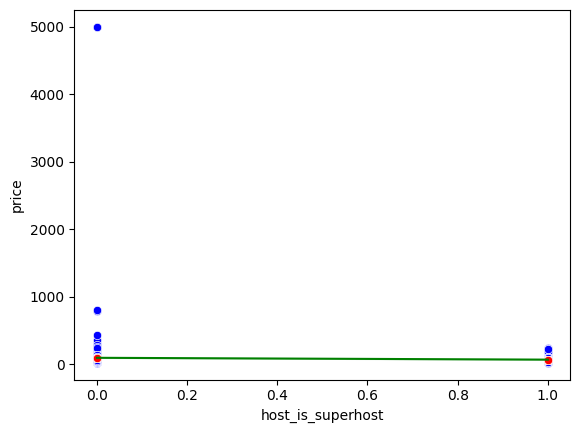

In [31]:
#visualizamos la gráfica comparativa entre el total real y el total predicto
sns.scatterplot(x='host_is_superhost', y='price', color="blue", data=data_2)
sns.scatterplot(x='host_is_superhost', y='Predicciones', color="red", data=data_2)
sns.lineplot(x='host_is_superhost', y='Predicciones', color="green", data=data_2)

In [32]:
#Corroboramos cual es el coeficiente de Determinción de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.00378611112439331

In [33]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.06153138324784605

In [34]:
#Eliminamos columna de tipo string
data2=data_2.drop(data.select_dtypes(include=['object']).columns, axis=1)

C:\Users\aresm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aresm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aresm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values t

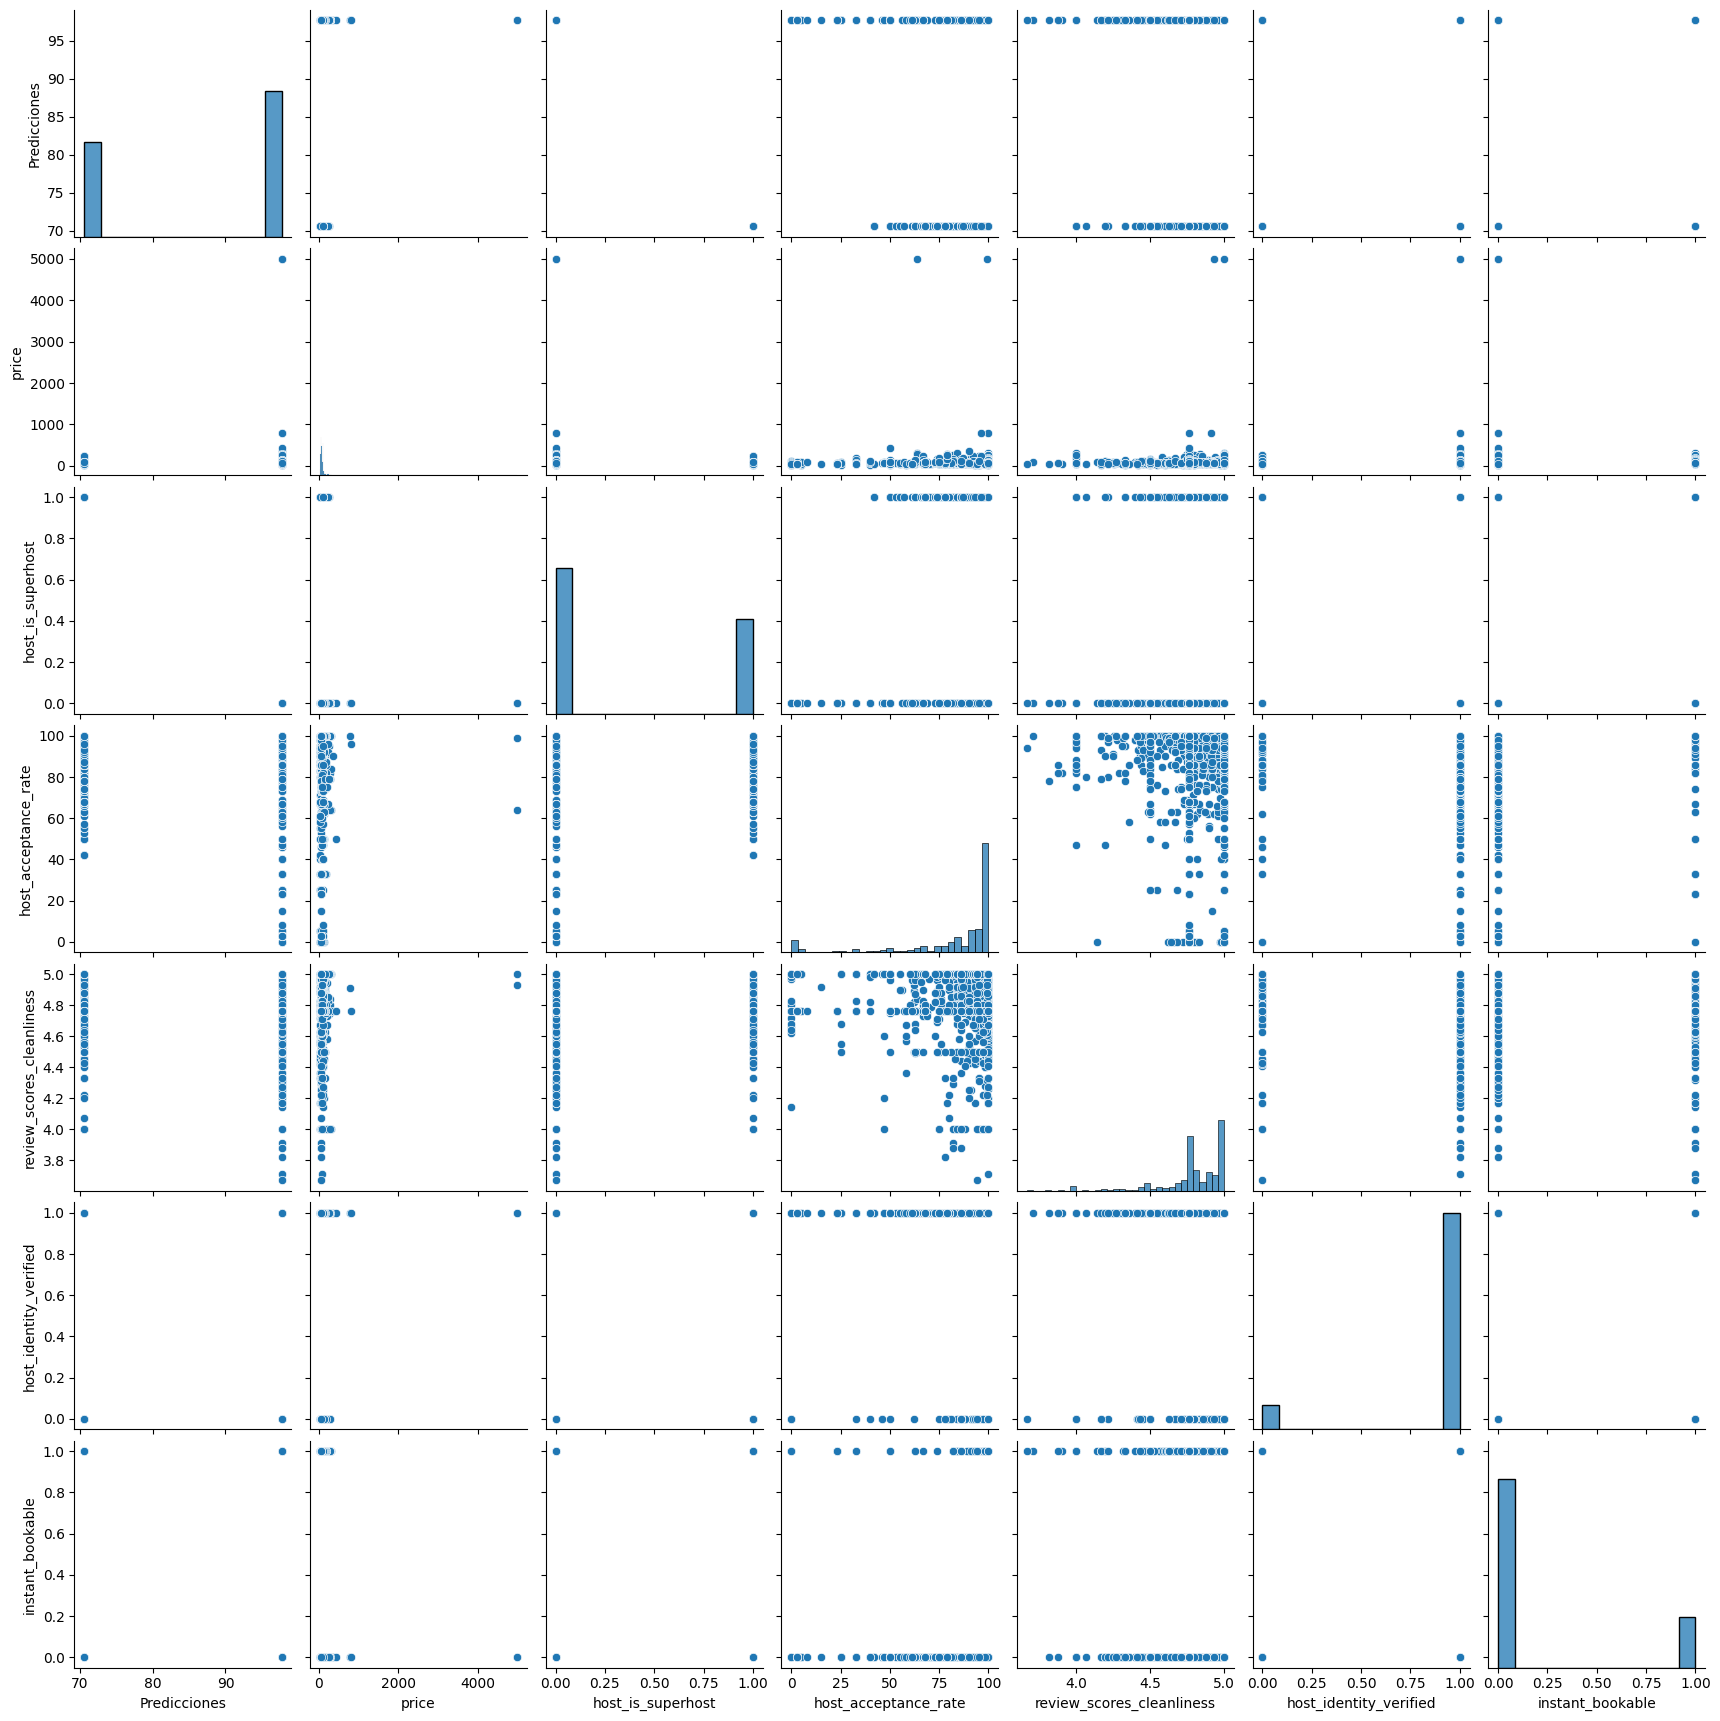

In [35]:
sns.pairplot(data2)

In [36]:
#Correlaci9ones entre variables
Corr_Factors=data2.corr()
Corr_Factors

,Predicciones,price,host_is_superhost,host_acceptance_rate,review_scores_cleanliness,host_identity_verified,instant_bookable
Predicciones,1.000000,0.061531,-1.000000,-0.223062,-0.228251,0.026430,0.049176
price,0.061531,1.000000,-0.061531,0.023647,0.041908,0.007500,-0.005605
host_is_superhost,-1.000000,-0.061531,1.000000,0.223062,0.228251,-0.026430,-0.049176
host_acceptance_rate,-0.223062,0.023647,0.223062,1.000000,0.021555,-0.067488,0.181277
review_scores_cleanliness,-0.228251,0.041908,0.228251,0.021555,1.000000,0.045820,-0.086815
host_identity_verified,0.026430,0.007500,-0.026430,-0.067488,0.045820,1.000000,-0.046973
instant_bookable,0.049176,-0.005605,-0.049176,0.181277,-0.086815,-0.046973,1.000000


In [37]:
#Encotramos el valor absoluto de todas las correlaciones entres ls variables
Corr_Factors1=abs(Corr_Factors)
Corr_Factors1

,Predicciones,price,host_is_superhost,host_acceptance_rate,review_scores_cleanliness,host_identity_verified,instant_bookable
Predicciones,1.000000,0.061531,1.000000,0.223062,0.228251,0.026430,0.049176
price,0.061531,1.000000,0.061531,0.023647,0.041908,0.007500,0.005605
host_is_superhost,1.000000,0.061531,1.000000,0.223062,0.228251,0.026430,0.049176
host_acceptance_rate,0.223062,0.023647,0.223062,1.000000,0.021555,0.067488,0.181277
review_scores_cleanliness,0.228251,0.041908,0.228251,0.021555,1.000000,0.045820,0.086815
host_identity_verified,0.026430,0.007500,0.026430,0.067488,0.045820,1.000000,0.046973
instant_bookable,0.049176,0.005605,0.049176,0.181277,0.086815,0.046973,1.000000


<Axes: >

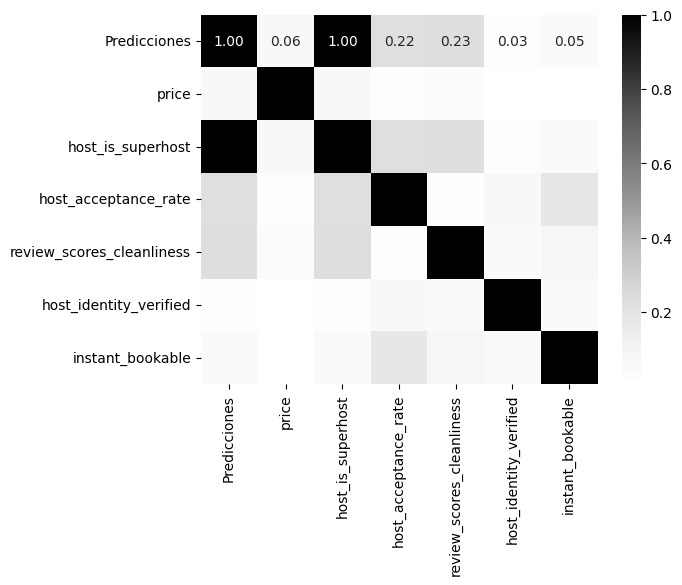

In [38]:
#Graficamos mapa de calor de los coeficientes de correlación
Heat_Map = sns.heatmap(Corr_Factors1, cmap= 'Greys', annot = True, fmt=".2f")
Heat_Map

**price vs review_scores_cleanliness**

<Axes: xlabel='review_scores_cleanliness', ylabel='price'>

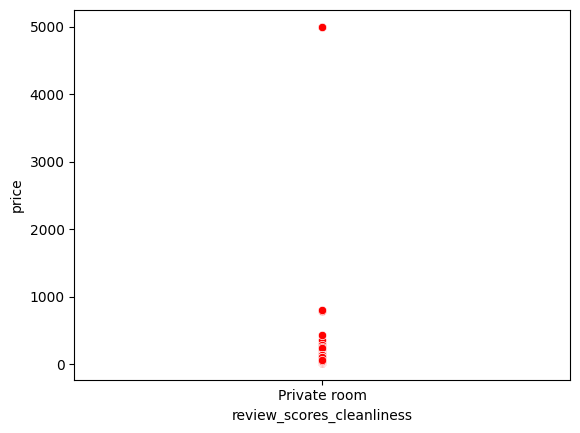

In [39]:
sns.scatterplot(x='review_scores_cleanliness', y='price', color='blue', data=data)
sns.scatterplot(x='room_type', y='price', color='red', data=data_3)

In [40]:
#Declaraqmos las variables dependientes e independiente para la regr4esión lineal 

#Vars_Indep = df[['alcohol], ['speeding]]
Vars_Indep = data_3[['review_scores_cleanliness']]
Var_Dep = data_3['price']

In [41]:
model=LinearRegression()

In [42]:
type(model)

sklearn.linear_model._base.LinearRegression

In [43]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [44]:
#Verificamos los coeficientes obtenidos para elmodelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_cleanliness'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([42.33564166]),
 'rank_': 1,
 'singular_': array([7.10361537]),
 'intercept_': -116.31084046800106}

**modelo matemático**

In [45]:
#Evaluación de la eficiencia del modelo obteniudo por medio del coeficiente R determinación
model.score(Vars_Indep, Var_Dep)

0.0017563051338400637

In [46]:
#Predecimos los valores del total de accidentes a partir de la variable "alcohol"
#y_pred = model.predict(X=df[['alcohol'], ['speeding']])
y_pred = model.predict(X = Vars_Indep)
y_pred

array([95.36736786, 77.16304194, 76.31632911, ..., 85.2996536 ,
       85.2996536 , 85.2996536 ])

In [47]:
#Se inserta la columna "Predicciones" al dataframe
data_3.insert(0, 'Predicciones',y_pred)
data_3

,Predicciones,room_type,price,host_response_rate,host_is_superhost,host_acceptance_rate,bathrooms_text,review_scores_cleanliness,host_identity_verified,instant_bookable,property_type
0,95.367368,Private room,73.0,100%,0.0,98.0,1 private bath,5.000000,1.0,0.0,Private room in home
1,77.163042,Private room,75.0,100%,0.0,93.0,1 shared bath,4.570000,1.0,1.0,Private room in rental unit
2,76.316329,Private room,36.0,100%,1.0,100.0,1 shared bath,4.550000,1.0,0.0,Private room in home
3,94.520655,Private room,41.0,100%,1.0,100.0,1.5 shared baths,4.980000,1.0,0.0,Private room in home
4,80.126537,Private room,50.0,100%,0.0,86.0,1 shared bath,4.640000,1.0,0.0,Private room in home
...,...,...,...,...,...,...,...,...,...,...,...
1105,85.299654,Private room,54.0,80%,0.0,23.0,2 shared baths,4.762193,1.0,1.0,Private room in home
1106,85.299654,Private room,53.0,80%,0.0,23.0,2 shared baths,4.762193,1.0,1.0,Private room in home
1107,85.299654,Private room,112.0,100%,0.0,95.0,1 private bath,4.762193,1.0,0.0,Private room in bed and breakfast
1108,85.299654,Private room,52.0,32%,0.0,3.0,1 bath,4.762193,1.0,0.0,Private room in rental unit


C:\Users\aresm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aresm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='review_scores_cleanliness', ylabel='price'>

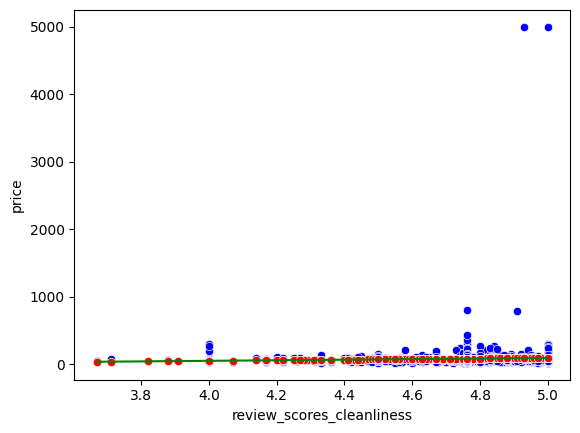

In [48]:
#visualizamos la gráfica comparativa entre el total real y el total predicto
sns.scatterplot(x='review_scores_cleanliness', y='price', color="blue", data=data_3)
sns.scatterplot(x='review_scores_cleanliness', y='Predicciones', color="red", data=data_3)
sns.lineplot(x='review_scores_cleanliness', y='Predicciones', color="green", data=data_3)

In [49]:
#Corroboramos cual es el coeficiente de Determinción de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.0017563051338400637

In [50]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.041908294332268684

In [51]:
#Eliminamos columna de tipo string
data3=data_3.drop(data.select_dtypes(include=['object']).columns, axis=1)

C:\Users\aresm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aresm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aresm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values t

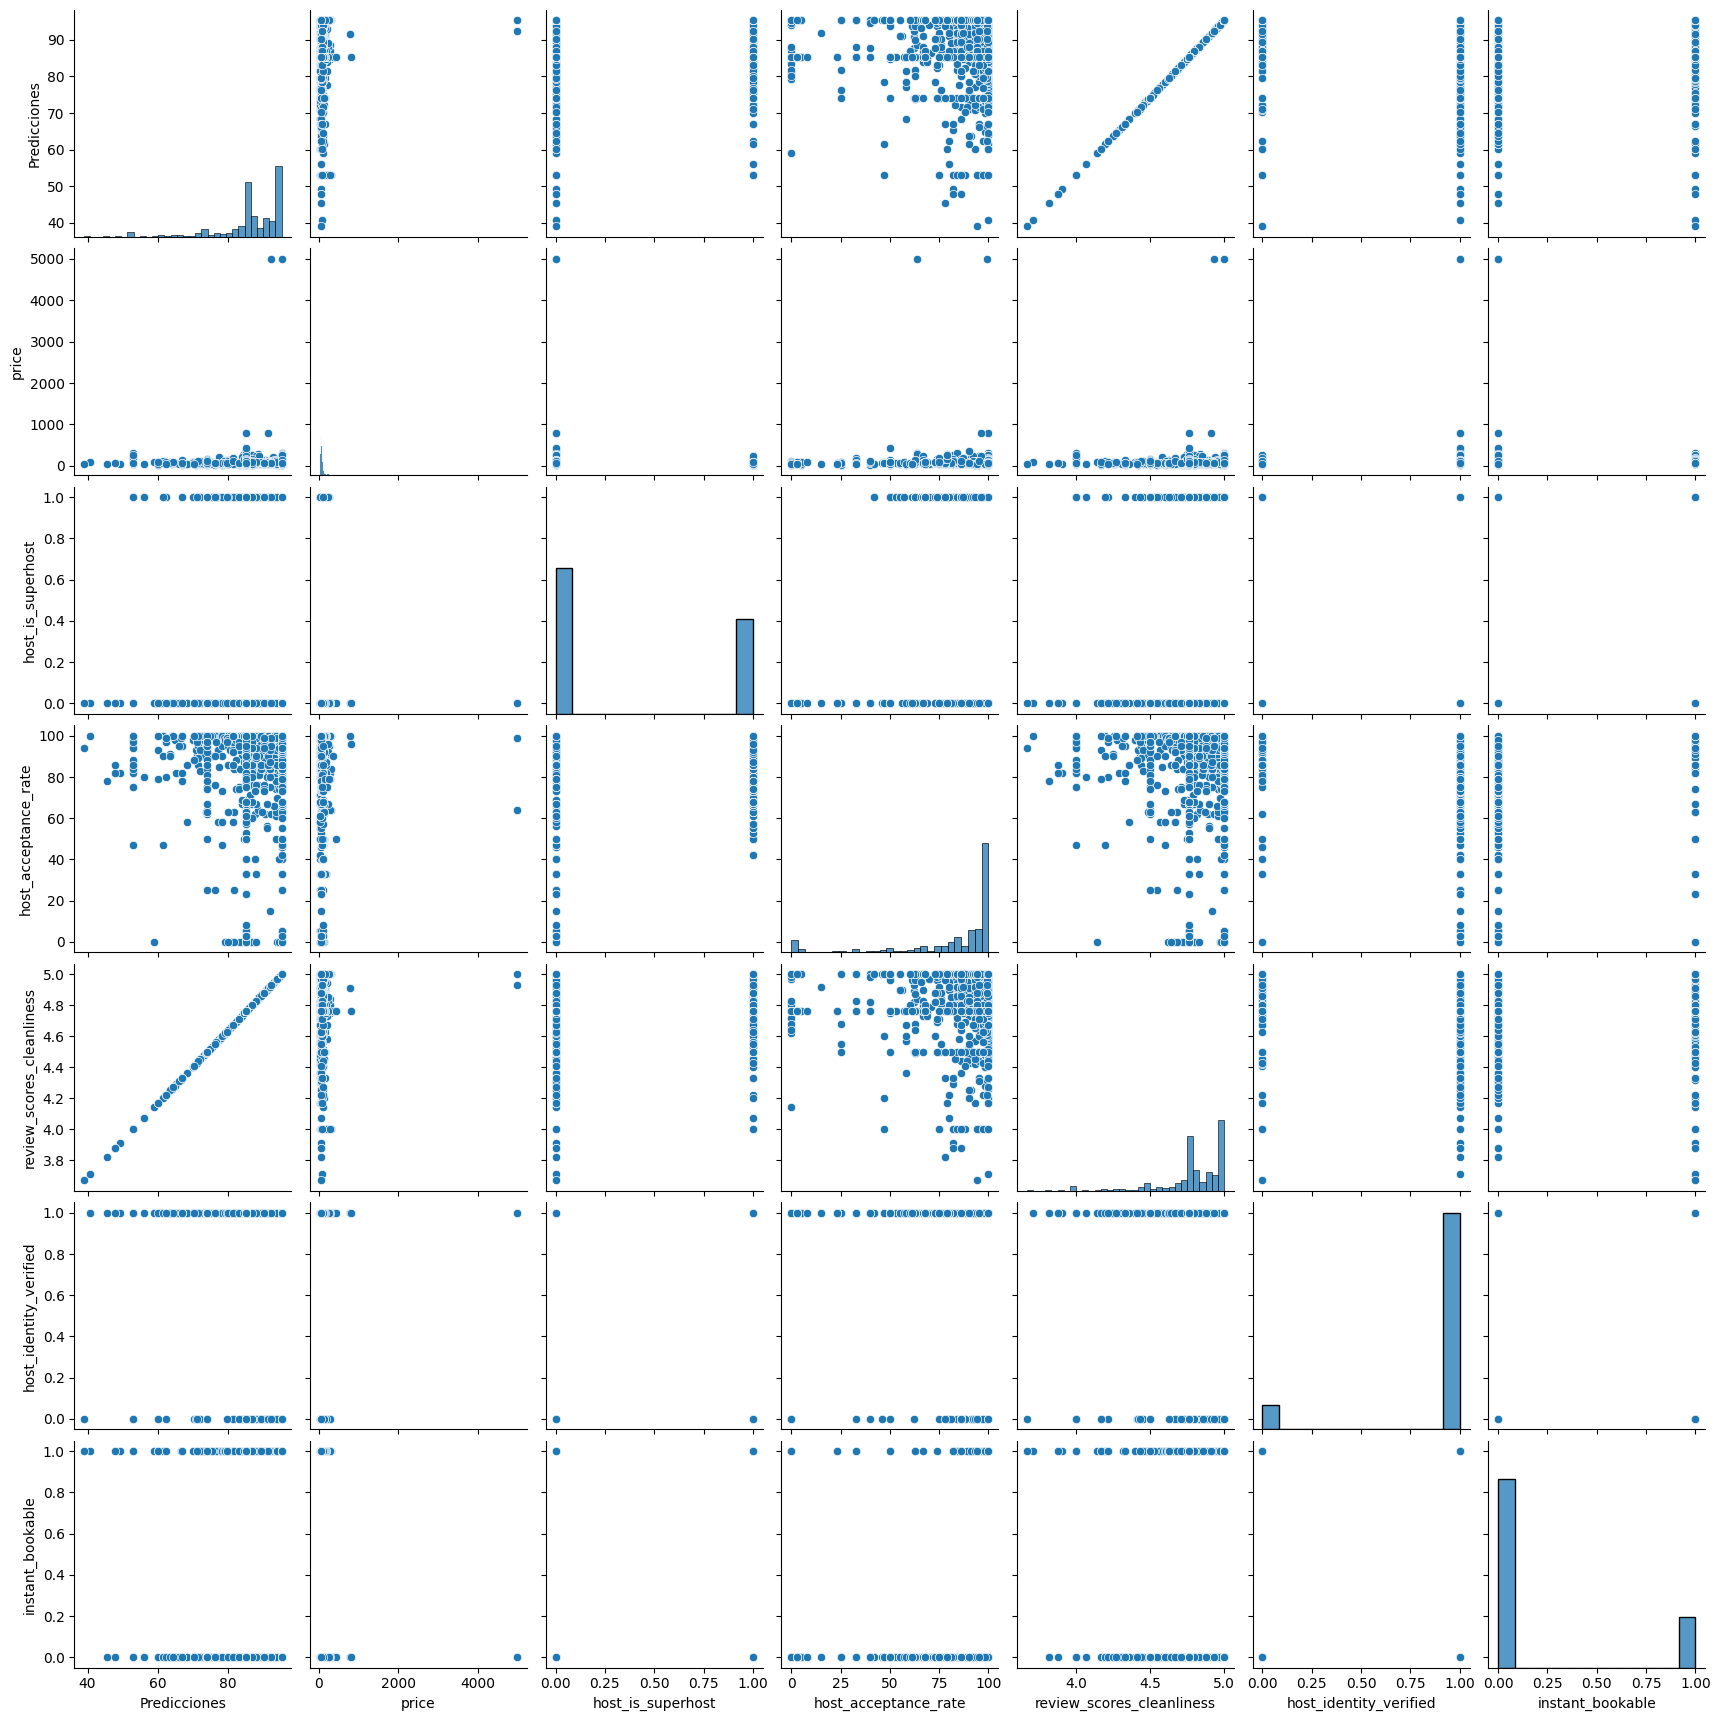

In [52]:
#Graficamos todas laas dispersones entre todas las variables
sns.pairplot(data3)

In [53]:
#Correlaci9ones entre variables
Corr_Factors=data3.corr()
Corr_Factors

,Predicciones,price,host_is_superhost,host_acceptance_rate,review_scores_cleanliness,host_identity_verified,instant_bookable
Predicciones,1.000000,0.041908,0.228251,0.021555,1.000000,0.045820,-0.086815
price,0.041908,1.000000,-0.061531,0.023647,0.041908,0.007500,-0.005605
host_is_superhost,0.228251,-0.061531,1.000000,0.223062,0.228251,-0.026430,-0.049176
host_acceptance_rate,0.021555,0.023647,0.223062,1.000000,0.021555,-0.067488,0.181277
review_scores_cleanliness,1.000000,0.041908,0.228251,0.021555,1.000000,0.045820,-0.086815
host_identity_verified,0.045820,0.007500,-0.026430,-0.067488,0.045820,1.000000,-0.046973
instant_bookable,-0.086815,-0.005605,-0.049176,0.181277,-0.086815,-0.046973,1.000000


In [54]:
#Encotramos el valor absoluto de todas las correlaciones entres ls variables
Corr_Factors1=abs(Corr_Factors)
Corr_Factors1

,Predicciones,price,host_is_superhost,host_acceptance_rate,review_scores_cleanliness,host_identity_verified,instant_bookable
Predicciones,1.000000,0.041908,0.228251,0.021555,1.000000,0.045820,0.086815
price,0.041908,1.000000,0.061531,0.023647,0.041908,0.007500,0.005605
host_is_superhost,0.228251,0.061531,1.000000,0.223062,0.228251,0.026430,0.049176
host_acceptance_rate,0.021555,0.023647,0.223062,1.000000,0.021555,0.067488,0.181277
review_scores_cleanliness,1.000000,0.041908,0.228251,0.021555,1.000000,0.045820,0.086815
host_identity_verified,0.045820,0.007500,0.026430,0.067488,0.045820,1.000000,0.046973
instant_bookable,0.086815,0.005605,0.049176,0.181277,0.086815,0.046973,1.000000


<Axes: >

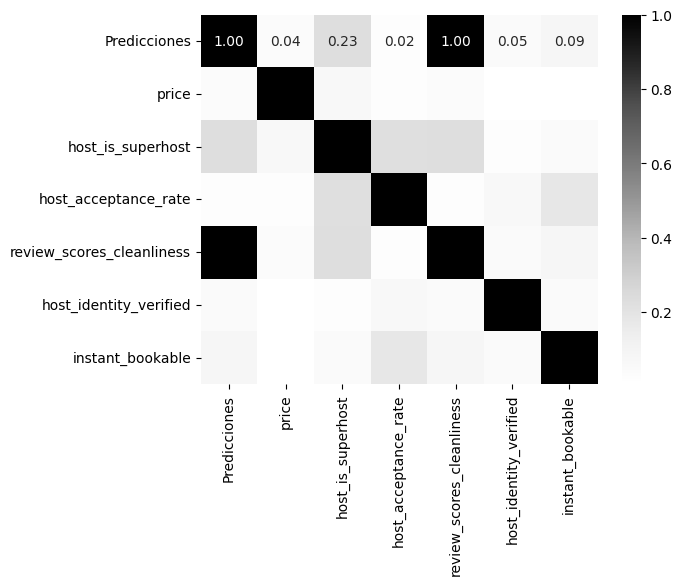

In [55]:
#Graficamos mapa de calor de los coeficientes de correlación
Heat_Map = sns.heatmap(Corr_Factors1, cmap= 'Greys', annot = True, fmt=".2f")
Heat_Map

**price vs host_identity_verified**

<Axes: xlabel='host_identity_verified', ylabel='price'>

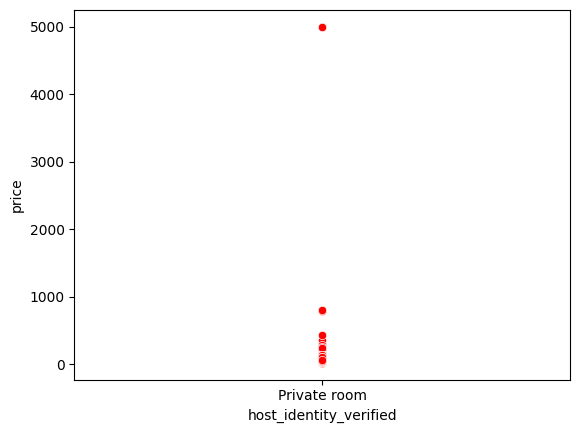

In [56]:
sns.scatterplot(x='host_identity_verified', y='price', color='blue', data=data_4)
sns.scatterplot(x='room_type', y='price', color='red', data=data_4)

In [57]:
#Declaraqmos las variables dependientes e independiente para la regr4esión lineal 

#Vars_Indep = df[['alcohol], ['speeding]]
Vars_Indep = data_3[['host_identity_verified']]
Var_Dep = data_3['price']

In [58]:
model=LinearRegression()

In [59]:
type(model)

sklearn.linear_model._base.LinearRegression

In [60]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)


LinearRegression()

In [61]:
#Verificamos los coeficientes obtenidos para elmodelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_identity_verified'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([5.38438438]),
 'rank_': 1,
 'singular_': array([9.99499875]),
 'intercept_': 82.18918918918922}

**modelo matemático**

In [62]:
#Evaluación de la eficiencia del modelo obteniudo por medio del coeficiente R determinación
model.score(Vars_Indep, Var_Dep)

5.624273107007749e-05

In [63]:
#Predecimos los valores del total de accidentes a partir de la variable "alcohol"
#y_pred = model.predict(X=df[['alcohol'], ['speeding']])
y_pred = model.predict(X = Vars_Indep)
y_pred

array([87.57357357, 87.57357357, 87.57357357, ..., 87.57357357,
       87.57357357, 87.57357357])

In [64]:
#Se inserta la columna "Predicciones" al dataframe
data_4.insert(0, 'Predicciones',y_pred)
data_4

,Predicciones,room_type,price,host_response_rate,host_is_superhost,host_acceptance_rate,bathrooms_text,review_scores_cleanliness,host_identity_verified,instant_bookable,property_type
0,87.573574,Private room,73.0,100%,0.0,98.0,1 private bath,5.000000,1.0,0.0,Private room in home
1,87.573574,Private room,75.0,100%,0.0,93.0,1 shared bath,4.570000,1.0,1.0,Private room in rental unit
2,87.573574,Private room,36.0,100%,1.0,100.0,1 shared bath,4.550000,1.0,0.0,Private room in home
3,87.573574,Private room,41.0,100%,1.0,100.0,1.5 shared baths,4.980000,1.0,0.0,Private room in home
4,87.573574,Private room,50.0,100%,0.0,86.0,1 shared bath,4.640000,1.0,0.0,Private room in home
...,...,...,...,...,...,...,...,...,...,...,...
1105,87.573574,Private room,54.0,80%,0.0,23.0,2 shared baths,4.762193,1.0,1.0,Private room in home
1106,87.573574,Private room,53.0,80%,0.0,23.0,2 shared baths,4.762193,1.0,1.0,Private room in home
1107,87.573574,Private room,112.0,100%,0.0,95.0,1 private bath,4.762193,1.0,0.0,Private room in bed and breakfast
1108,87.573574,Private room,52.0,32%,0.0,3.0,1 bath,4.762193,1.0,0.0,Private room in rental unit


C:\Users\aresm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aresm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='host_identity_verified', ylabel='price'>

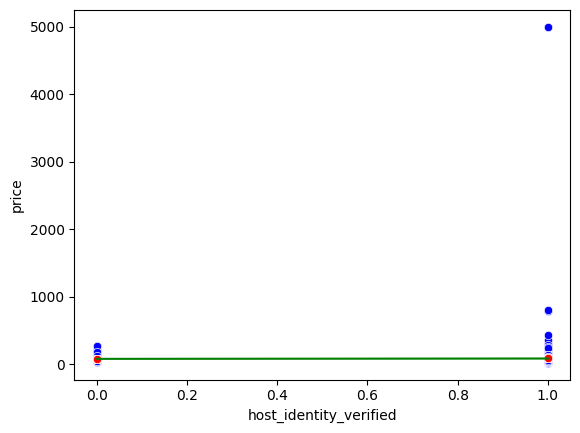

In [65]:
#visualizamos la gráfica comparativa entre el total real y el total predicto
sns.scatterplot(x='host_identity_verified', y='price', color="blue", data=data_4)
sns.scatterplot(x='host_identity_verified', y='Predicciones', color="red", data=data_4)
sns.lineplot(x='host_identity_verified', y='Predicciones', color="green", data=data_4)


In [66]:
#Corroboramos cual es el coeficiente de Determinción de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

5.624273107007749e-05

In [67]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.007499515389015312

In [68]:
#Eliminamos columna de tipo string
data4=data_4.drop(data.select_dtypes(include=['object']).columns, axis=1)


In [69]:
#Correlaci9ones entre variables
Corr_Factors=data4.corr()
Corr_Factors

,Predicciones,price,host_is_superhost,host_acceptance_rate,review_scores_cleanliness,host_identity_verified,instant_bookable
Predicciones,1.000000,0.007500,-0.026430,-0.067488,0.045820,1.000000,-0.046973
price,0.007500,1.000000,-0.061531,0.023647,0.041908,0.007500,-0.005605
host_is_superhost,-0.026430,-0.061531,1.000000,0.223062,0.228251,-0.026430,-0.049176
host_acceptance_rate,-0.067488,0.023647,0.223062,1.000000,0.021555,-0.067488,0.181277
review_scores_cleanliness,0.045820,0.041908,0.228251,0.021555,1.000000,0.045820,-0.086815
host_identity_verified,1.000000,0.007500,-0.026430,-0.067488,0.045820,1.000000,-0.046973
instant_bookable,-0.046973,-0.005605,-0.049176,0.181277,-0.086815,-0.046973,1.000000


In [70]:
#Encotramos el valor absoluto de todas las correlaciones entres ls variables
Corr_Factors1=abs(Corr_Factors)
Corr_Factors1

,Predicciones,price,host_is_superhost,host_acceptance_rate,review_scores_cleanliness,host_identity_verified,instant_bookable
Predicciones,1.000000,0.007500,0.026430,0.067488,0.045820,1.000000,0.046973
price,0.007500,1.000000,0.061531,0.023647,0.041908,0.007500,0.005605
host_is_superhost,0.026430,0.061531,1.000000,0.223062,0.228251,0.026430,0.049176
host_acceptance_rate,0.067488,0.023647,0.223062,1.000000,0.021555,0.067488,0.181277
review_scores_cleanliness,0.045820,0.041908,0.228251,0.021555,1.000000,0.045820,0.086815
host_identity_verified,1.000000,0.007500,0.026430,0.067488,0.045820,1.000000,0.046973
instant_bookable,0.046973,0.005605,0.049176,0.181277,0.086815,0.046973,1.000000


<Axes: >

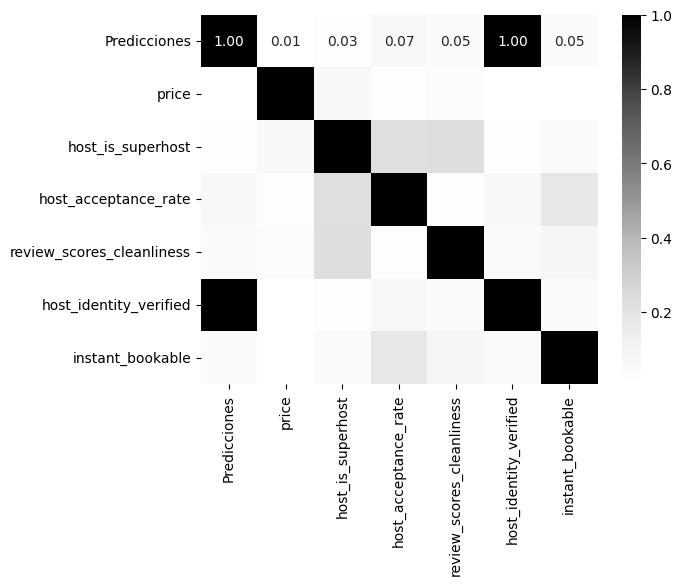

In [71]:
#Graficamos mapa de calor de los coeficientes de correlación
Heat_Map = sns.heatmap(Corr_Factors1, cmap= 'Greys', annot = True, fmt=".2f")
Heat_Map

**price vs instant_bookable**

<Axes: xlabel='instant_bookable', ylabel='price'>

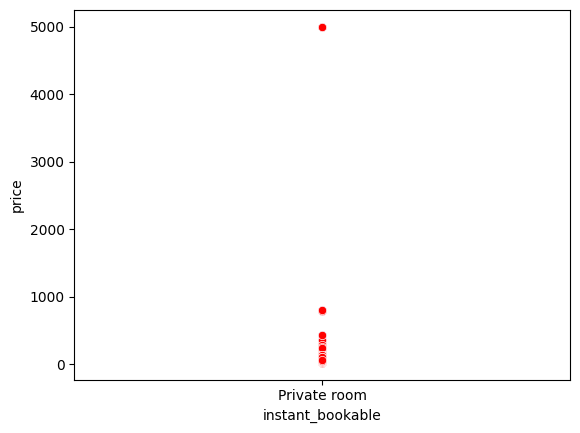

In [72]:
sns.scatterplot(x='instant_bookable', y='price', color='blue', data=data_5)
sns.scatterplot(x='room_type', y='price', color='red', data=data_5)

In [73]:
#Declaraqmos las variables dependientes e independiente para la regr4esión lineal 

#Vars_Indep = df[['alcohol], ['speeding]]
Vars_Indep = data_5[['instant_bookable']]
Var_Dep = data_5['price']

In [74]:
model=LinearRegression()

type(model)

sklearn.linear_model._base.LinearRegression

In [75]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)


LinearRegression()

In [76]:
#Verificamos los coeficientes obtenidos para elmodelo ajustado
model.__dict__


{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['instant_bookable'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-2.95060699]),
 'rank_': 1,
 'singular_': array([13.63170655]),
 'intercept_': 87.662471395881}

In [77]:
# **modelo matematico**
#Evaluación de la eficiencia del modelo obteniudo por medio del coeficiente R determinación
model.score(Vars_Indep, Var_Dep)

3.1416079794066576e-05

In [78]:
#Predecimos los valores del total de accidentes a partir de la variable "alcohol"
#y_pred = model.predict(X=df[['alcohol'], ['speeding']])
y_pred = model.predict(X = Vars_Indep)
y_pred

array([87.6624714 , 84.71186441, 87.6624714 , ..., 87.6624714 ,
       87.6624714 , 84.71186441])

In [81]:
#Se inserta la columna "Predicciones" al dataframe
data_5.insert(0, 'Predicciones',y_pred)
data_5

,Predicciones,room_type,price,host_response_rate,host_is_superhost,host_acceptance_rate,bathrooms_text,review_scores_cleanliness,host_identity_verified,instant_bookable,property_type
0,87.662471,Private room,73.0,100%,0.0,98.0,1 private bath,5.000000,1.0,0.0,Private room in home
1,84.711864,Private room,75.0,100%,0.0,93.0,1 shared bath,4.570000,1.0,1.0,Private room in rental unit
2,87.662471,Private room,36.0,100%,1.0,100.0,1 shared bath,4.550000,1.0,0.0,Private room in home
3,87.662471,Private room,41.0,100%,1.0,100.0,1.5 shared baths,4.980000,1.0,0.0,Private room in home
4,87.662471,Private room,50.0,100%,0.0,86.0,1 shared bath,4.640000,1.0,0.0,Private room in home
...,...,...,...,...,...,...,...,...,...,...,...
1105,84.711864,Private room,54.0,80%,0.0,23.0,2 shared baths,4.762193,1.0,1.0,Private room in home
1106,84.711864,Private room,53.0,80%,0.0,23.0,2 shared baths,4.762193,1.0,1.0,Private room in home
1107,87.662471,Private room,112.0,100%,0.0,95.0,1 private bath,4.762193,1.0,0.0,Private room in bed and breakfast
1108,87.662471,Private room,52.0,32%,0.0,3.0,1 bath,4.762193,1.0,0.0,Private room in rental unit


C:\Users\aresm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aresm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='instant_bookable', ylabel='price'>

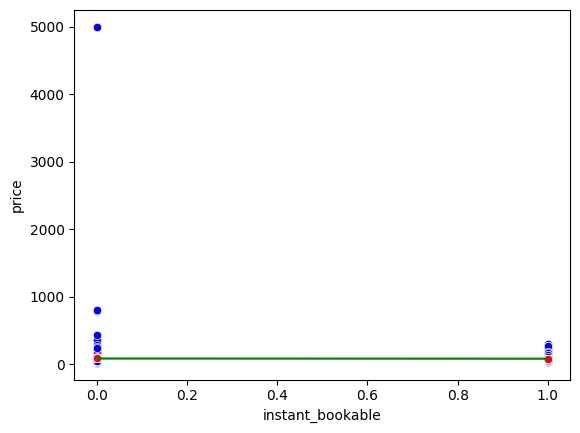

In [82]:
#visualizamos la gráfica comparativa entre el total real y el total predicto
sns.scatterplot(x='instant_bookable', y='price', color="blue", data=data_5)
sns.scatterplot(x='instant_bookable', y='Predicciones', color="red", data=data_5)
sns.lineplot(x='instant_bookable', y='Predicciones', color="green", data=data_5)

In [83]:
#Corroboramos cual es el coeficiente de Determinción de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

3.1416079794066576e-05

In [84]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.005605004887960989

In [85]:
#Eliminamos columna de tipo string
data5=data_5.drop(data.select_dtypes(include=['object']).columns, axis=1)

C:\Users\aresm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aresm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aresm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values t

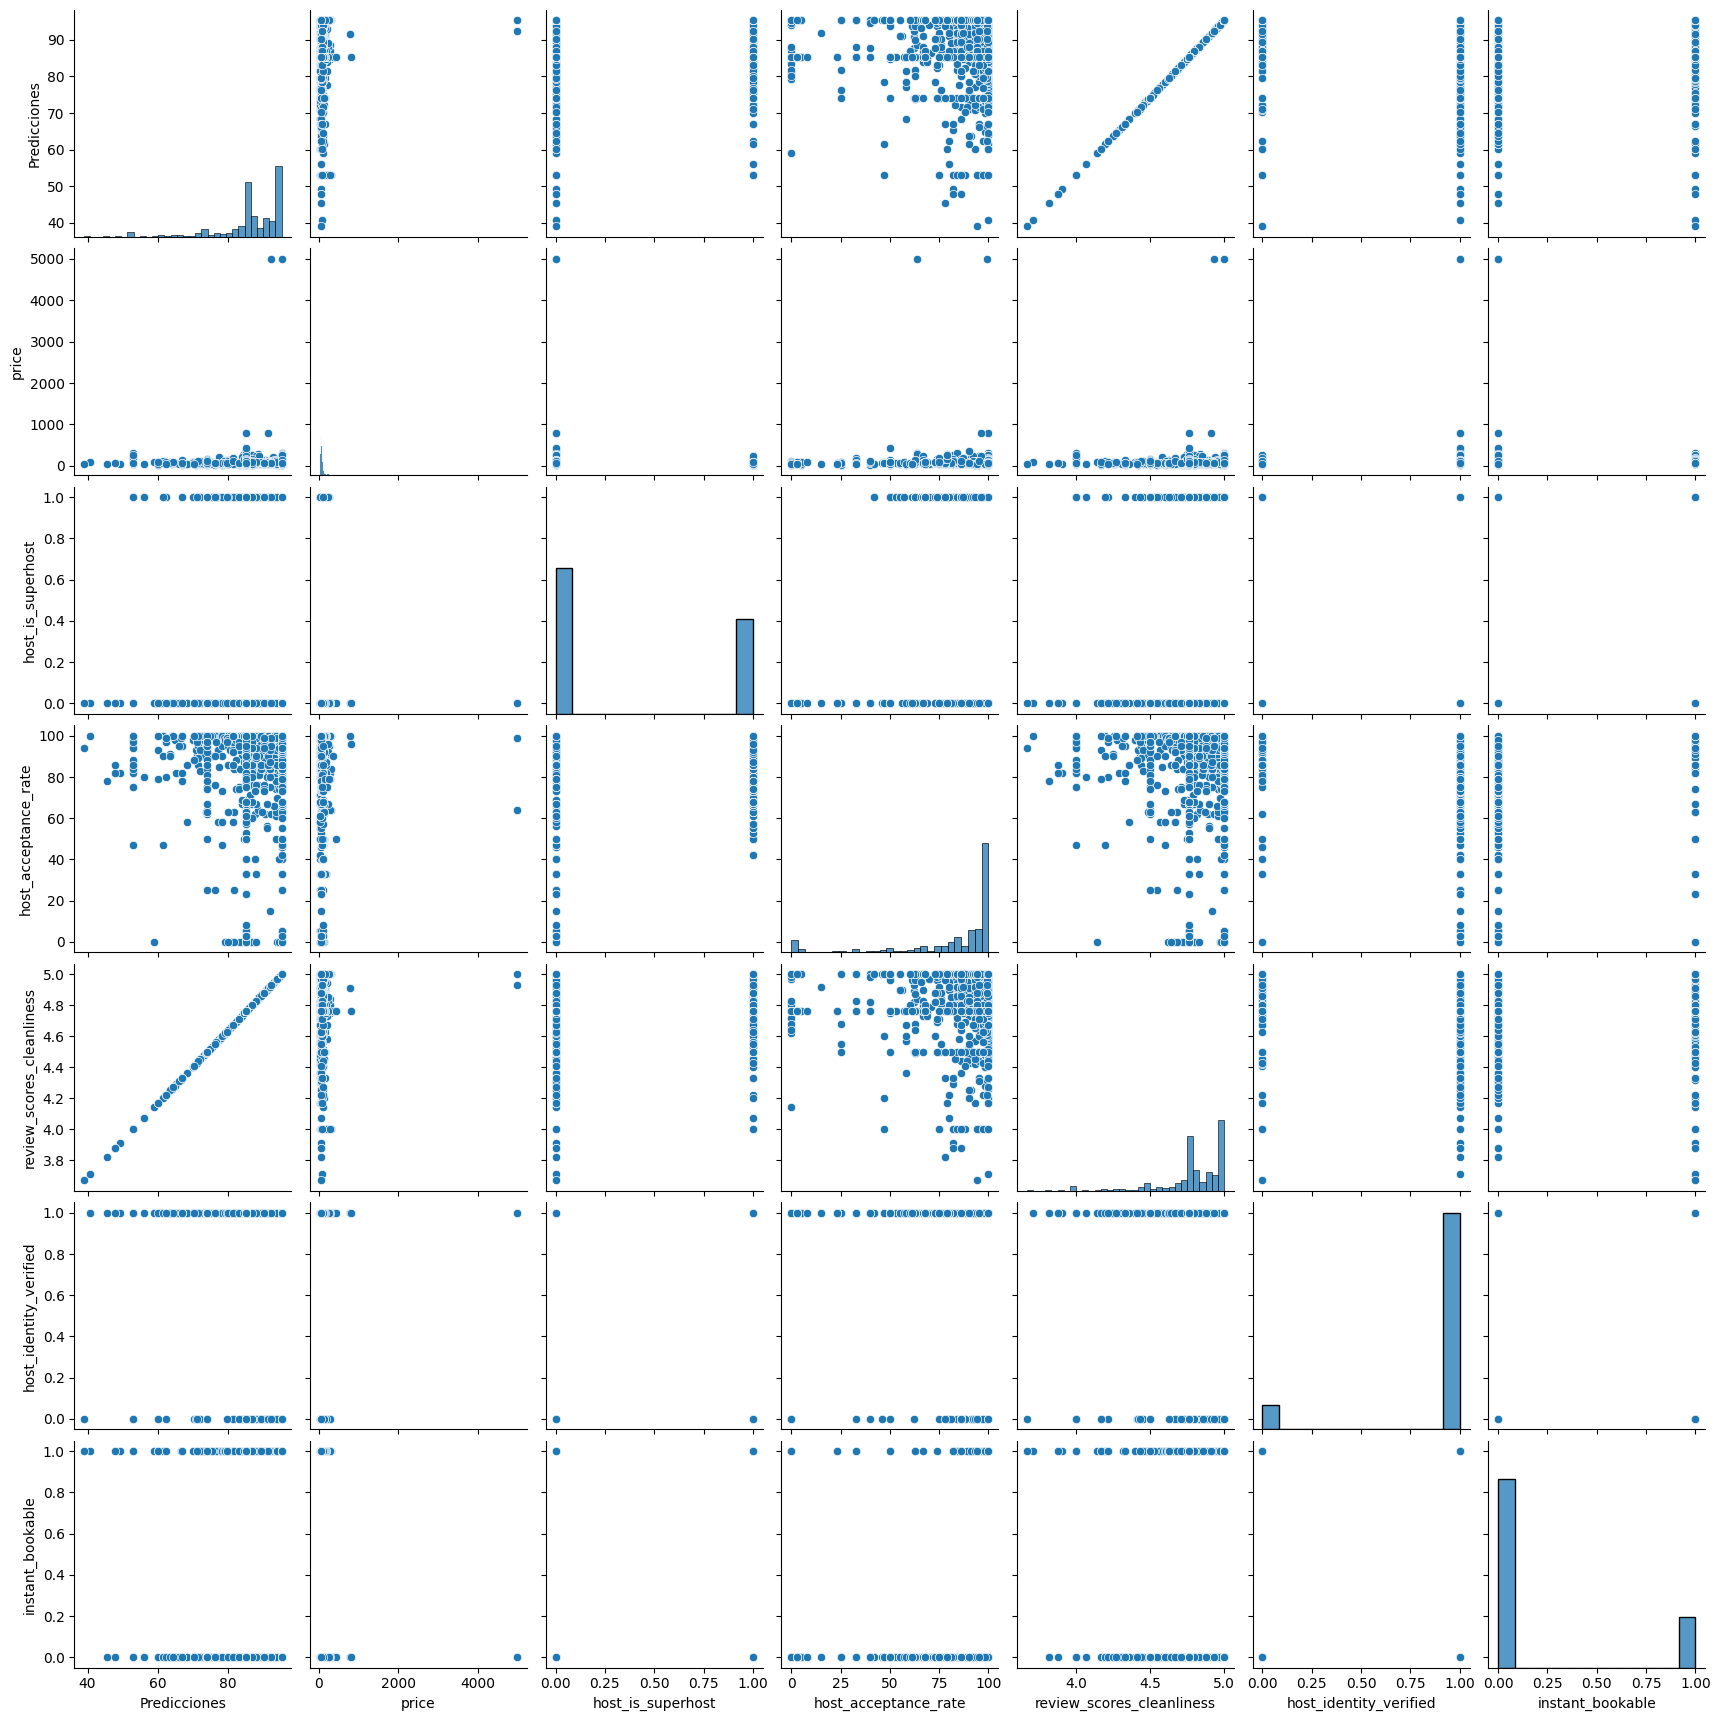

In [86]:
#Graficamos todas laas dispersones entre todas las variables
sns.pairplot(data3)

In [87]:
#Correlaci9ones entre variables
Corr_Factors=data5.corr()
Corr_Factors

,Predicciones,price,host_is_superhost,host_acceptance_rate,review_scores_cleanliness,host_identity_verified,instant_bookable
Predicciones,1.000000,0.005605,0.049176,-0.181277,0.086815,0.046973,-1.000000
price,0.005605,1.000000,-0.061531,0.023647,0.041908,0.007500,-0.005605
host_is_superhost,0.049176,-0.061531,1.000000,0.223062,0.228251,-0.026430,-0.049176
host_acceptance_rate,-0.181277,0.023647,0.223062,1.000000,0.021555,-0.067488,0.181277
review_scores_cleanliness,0.086815,0.041908,0.228251,0.021555,1.000000,0.045820,-0.086815
host_identity_verified,0.046973,0.007500,-0.026430,-0.067488,0.045820,1.000000,-0.046973
instant_bookable,-1.000000,-0.005605,-0.049176,0.181277,-0.086815,-0.046973,1.000000


In [88]:
#Encotramos el valor absoluto de todas las correlaciones entres ls variables
Corr_Factors1=abs(Corr_Factors)
Corr_Factors1


,Predicciones,price,host_is_superhost,host_acceptance_rate,review_scores_cleanliness,host_identity_verified,instant_bookable
Predicciones,1.000000,0.005605,0.049176,0.181277,0.086815,0.046973,1.000000
price,0.005605,1.000000,0.061531,0.023647,0.041908,0.007500,0.005605
host_is_superhost,0.049176,0.061531,1.000000,0.223062,0.228251,0.026430,0.049176
host_acceptance_rate,0.181277,0.023647,0.223062,1.000000,0.021555,0.067488,0.181277
review_scores_cleanliness,0.086815,0.041908,0.228251,0.021555,1.000000,0.045820,0.086815
host_identity_verified,0.046973,0.007500,0.026430,0.067488,0.045820,1.000000,0.046973
instant_bookable,1.000000,0.005605,0.049176,0.181277,0.086815,0.046973,1.000000


<Axes: >

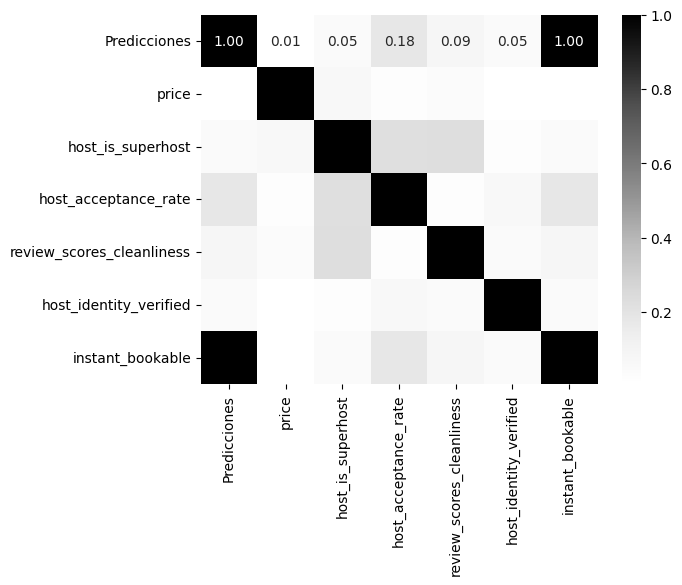

In [89]:

#Graficamos mapa de calor de los coeficientes de correlación
Heat_Map = sns.heatmap(Corr_Factors1, cmap= 'Greys', annot = True, fmt=".2f")
Heat_Map

**price vs property_type**